# MPA-MLF, Lab 5 - Feedforward Neural Networks

These exercises are focused on dealing with neural networks. It is strongly recommended to use google collab for these pc labs. Why? Google collab offers a free GPU capacity to train machine learning models. Training NN on GPU can drastically speed up the training process. You can turn on the GPU accelerator in: Runtime -> Change runtime type -> GPU, 

## Exercise 1 - XOR problem

During the last lecture, we saw that the single perceptron model with a step function could be used only for solving linearly-separable classification problems. Because of that, a single perceptron can not be trained to be able to behave like an XOR gate. To approximate the XOR gate using a neural network, we need to use the following structure:

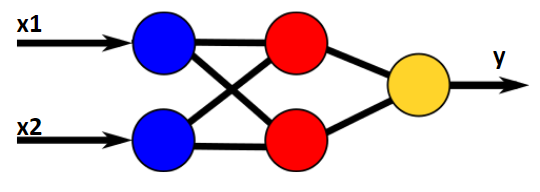

The above structure contains three layers: two neurons in the input layer (blue), two in the hidden layer and one in the output layer (yellow). The input layer represents the identity functions (the outputs are equal to the inputs)

We will use *Keras* API to build and train our neural network. Keras is an open-source neural network library written in Python. It is designed to enable fast experimentation with deep neural networks and provides a high-level API for building and training neural networks. 

### 0. First import libraries 

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

### 1. prepare data

In this part, the task would be to prepade our dataset, basically it is the logic table for *XOR* function

In [2]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

### 2. Creating the model

To create a model of NN that is in the picture above, run the following cell

In [3]:
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

**Sequential** is a model type used in Keras for building feedforward neural networks. It is called "sequential" because the layers are stacked sequentially on top of each other, and the output of one layer is passed as input to the next layer.

To create a sequential model, instantiate a Sequential object and then add layers to it using the **add()** method. There are many layers that Keras offers. We will use *Dense layer*

**Dense layer** represents a fully connected layer, which means that every neuron in the layer is connected to every neuron in the previous layer. In each layer, we will specify an activation function and the number of neurons that layer contains. The input layer is not defined as a dense layer, but instead of that, we will specify the *input_dim* parameter in the layer that follows the input layer. *input_dim* parameter specifies the number of neurons in the input layer

### 3. Compile the model

To compile yor model run:

In [4]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**keras.complile()** is used to configure the learning process before training the model. 
We need to specify 3 parameters:
- *loss*, *optimizer* and *metrics*

- as our loss function (error function/objective function), we will choose *binary_crossentropy* - loss function often used for binary classification

- *optimizer* is optimization algorithm used for optimizing weights in our training process, we will choose *stochastic gradient descent* 

- *metrics* is metric user for model evaluation


### 4. Model training

In the lecture, we talked about training the Multi-layer perceptron. The training process consists of the following steps:

1. Weight initialization
2. Forward Propagation
3. Compute Loss
4. Backpropagation
5. Update Weights
6. Repeat 2->6 until maximum epochs are reached

When training a machine learning model, the training data is usually divided into batches (parts), and the model updates its weights after processing each batch. The batch size determines how many training examples are included in each batch. 

For example, we have 10,000 training examples and a batch size of 100. In this case, the training data would be divided into 100 batches of 100 examples each. During training, the model would process each batch, calculate the loss or error, and update its weights based on the average of the errors in that batch. In other words, if we batch equal to 1. we will update the weights 10 000 times. If we have batch size == 100, we will update the weights only 100 times 

To train your model, run the following line of the code:

In [5]:
history = model.fit(X, y, epochs=500, batch_size=10, verbose=0)

the method **.fit()**, is used to train the model. We can see that it takes several input parameters:
 - *X* - input data
 - *y* - label for the input data
 - *epochs* number of training epochs (iterations)
 - *batch_size* - number of samples in each batch
 - *verbose* - set verbose parameter to see the progress of loss and metrics during the training epochs

These are not the only parameters the .fit() method can take. Check official documentation: https://keras.io/api/models/model_training_apis/

We will set the output of our .fit() function to variable *history*, where the loss and other metrics defined above in the .compile() function during the training are saved.

### 5. Model evaluation

Out training process is finished. To evaluate the performance of our model on test data, tun the following cell of the code:

In [6]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 100.00


### 6. Model predictions

In [7]:
for id_x, data_sample in enumerate(X):
  prediction = model.predict([data_sample])
  print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")

1/1 [==============================] - 0s 83ms/step
Data sample is [0, 0], prediction from model [[0.16955058]], ground_truth 0
1/1 [==============================] - 0s 34ms/step
Data sample is [0, 1], prediction from model [[0.76322526]], ground_truth 1
1/1 [==============================] - 0s 32ms/step
Data sample is [1, 0], prediction from model [[0.83536714]], ground_truth 1
1/1 [==============================] - 0s 34ms/step
Data sample is [1, 1], prediction from model [[0.14333244]], ground_truth 0


### 7. Display loss function during the training process and acuracy

Text(0, 0.5, 'loss')

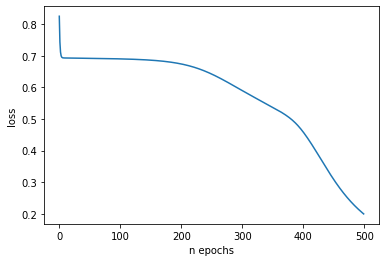

In [8]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

### TASK:

In this part of the exercise, the task would be to play around with the code above to see the influence of hyperparameters.

As we know from the lecture, neural networks contain two types of parameters:
  1. **Learnable parameters** - *weights* and *biases*. these parameters are adjusted in the training process.  
  2. **Non-learnable parameters (hyperparameters)** - learning_rate, number_of_neurons, number_of_layers, number_of_epochs, type of activation functions in the neurons.., basically any user-defined setting is considered to be hyperparameter


Change the following parameters: 
- number of epochs
- learning_rate
- activation functions in layers, 
- batch_size,
- verbose,
- number of neurons in the hidden layer

Moreover, see the influence on the training process and results.

**Note: Every time we change some hyper-parameters, do not forget to compile the model, to initialize the learnable parameters again**

## Exercise 2 - Congressional Voting Data

In the attached dataset, results from congressional voting can be found. Your task is to train a model that can recognize that the politician is *republican* or *democrat* based on voting results. We would follow the general machine learning steps that were described in the lecture.

In [9]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

### 1. Loading dataset

**First mount your google drive to google colab file.**

In [10]:
!wget https://raw.githubusercontent.com/MPA-MLF/Exercises/main/Lab_05/voting_complete.csv

path_to_dataset = 'voting_complete.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)

--2023-03-12 15:00:37--  https://raw.githubusercontent.com/MPA-MLF/Exercises/main/Lab_05/voting_complete.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20166 (20K) [text/plain]
Saving to: ‘voting_complete.csv.12’

voting_complete.csv 100%[===================>]  19.69K  --.-KB/s    in 0.001s  

2023-03-12 15:00:37 (22.5 MB/s) - ‘voting_complete.csv.12’ saved [20166/20166]



In [11]:
pd_dataset

,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


### 2. Train/Test Split

Fistlty we need to split our dataset into train and test. We will use 80% of dataset as our trainset and 20% od dataset as our testset. You can use functions included in *keras*, *scikit-learn*, or you can write your own:

In [12]:
# define a function for train and test split

def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]
    
    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()
    
    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]


In [13]:
x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

### 3. Data examination

The task would be to examine the dataset. Check:

1. Is it a classification of regression task?
2. How many data samples do we have?
3. How many features do we have?  
4. What data types do we have in our dataset?
5. Are there any missing values?
6. How many labels do we have? 


In [14]:
x_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,y,n,y,n,?,n,y,y,y,y,n,y,n,?,y,y
344,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
345,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
346,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y


In [15]:
y_train

0      republican
1      republican
2        democrat
3        democrat
4        democrat
          ...    
343      democrat
344    republican
345      democrat
346    republican
347    republican
Name: Class Name, Length: 348, dtype: object

### 4. Data preprocessing

When you preprocess your traing data, do not forget that you need to apply the same preprocessing also for your test set. For example: If you decide to delete some columns in your train set, you have to delete the same columns in your test set. 

Possible preprocessing steps (try several and see the influence of your preprocessing on your results)
 - Replace missing values with any data imputation technique ( for example, the most occurring value in the column), then perform one-hot encoding or label encoding of your data
 - Consider the missing value to be the third category 'unknown' and then perform one-hot encoding or label encoding

The target value also has to be encoded. This can be done by one-hot encoding or label encoding.

In [16]:
"""
def replace_x_ML(pd_data: pd.DataFrame) -> pd.DataFrame:

  for cols in range(pd_data.columns.size):
    allColumns = pd_data.columns
    column = pd_data[allColumns[cols]]
    ratio = column[column == 'y'].size/column.size
    if (ratio > 0.5) & (ratio <= 1):
      pd_data[allColumns[cols]] = pd_data[allColumns[cols]].replace('?','y')
    elif (ratio > 0) & (ratio <= 0.5):
      pd_data[allColumns[cols]] = pd_data[allColumns[cols]].replace('?','n')
    else:
      pass

  return pd_data

replaced = replace_x_ML(x_train)
"""
x_train = pd.get_dummies(x_train)
x_train.info()
x_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   handicapped-infants_?                     348 non-null    uint8
 1   handicapped-infants_n                     348 non-null    uint8
 2   handicapped-infants_y                     348 non-null    uint8
 3   water-project-cost-sharing_?              348 non-null    uint8
 4   water-project-cost-sharing_n              348 non-null    uint8
 5   water-project-cost-sharing_y              348 non-null    uint8
 6   adoption-of-the-budget-resolution_?       348 non-null    uint8
 7   adoption-of-the-budget-resolution_n       348 non-null    uint8
 8   adoption-of-the-budget-resolution_y       348 non-null    uint8
 9   physician-fee-freeze_?                    348 non-null    uint8
 10  physician-fee-freeze_n                    348 non-null    uint

,handicapped-infants_?,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_?,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_?,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_?,...,superfund-right-to-sue_y,crime_?,crime_n,crime_y,duty-free-exports_?,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_?,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,0,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
1,0,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,1,...,1,0,0,1,0,1,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
344,0,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
345,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
346,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [17]:
y_train = y_train.replace('democrat', 0).replace('republican',1)
y_train

0      1
1      1
2      0
3      0
4      0
      ..
343    0
344    1
345    0
346    1
347    1
Name: Class Name, Length: 348, dtype: int64

### 5. Creating the model

1. Create your model using alteast one hidden layer. 

*hint: do not create too complex models, this is a very simple task, so it would be enought to use just few neurons in the hidden layers*

In [18]:
modelVotes = Sequential()
modelVotes.add(Dense(4, input_dim=len(x_train.columns), activation='relu'))
modelVotes.add(Dense(2, activation='sigmoid'))
modelVotes.add(Dense(1, activation='sigmoid'))

2. Check what *model.summary()* does

In [19]:
modelVotes.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 196       
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


3. Compile the model, choose a suitable loss function, choose gradient to descend optimizer and specify the learning rate, and choose accuracy as our metric

In [20]:
optimizerVotes = tf.keras.optimizers.SGD(learning_rate=1)
modelVotes.compile(loss='binary_crossentropy', optimizer=optimizerVotes, metrics=['accuracy'])

4. Train the model. Specify the number of epochs and batch size. Now is the time to create a validation dataset. Set 20% of dataset to be a validation dataset

In [21]:
historyVotes = modelVotes.fit(x_train, y_train, epochs=100, batch_size=20, verbose=1, validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 1s 16ms/step - loss: 0.6309 - accuracy: 0.6007 - val_loss: 0.5490 - val_accuracy: 0.5857
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4256 - accuracy: 0.8597 - val_loss: 0.3877 - val_accuracy: 0.9000
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2970 - accuracy: 0.9317 - val_loss: 0.2993 - val_accuracy: 0.9286
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2147 - accuracy: 0.9532 - val_loss: 0.2501 - val_accuracy: 0.9143
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1589 - accuracy: 0.9748 - val_loss: 0.2246 - val_accuracy: 0.9143
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1199 - accuracy: 0.9784 - val_loss: 0.1904 - val_accuracy: 0.9571
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0970 - accuracy: 0.9856 - val_loss: 0.2069 - val_accuracy: 0.9286
Epoch 8/100


### 7. Model Evaluation 



1. First, apply the same preprocessing you did to train set to test set also

In [24]:
x_test = pd.get_dummies(x_test)
train_cols = list(x_train.columns)
test_cols = list(x_test.columns)
cols_not_in_test = {c:0 for c in train_cols if c not in test_cols}
x_test = x_test.assign(**cols_not_in_test)
x_test.info()
x_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   handicapped-infants_n                     87 non-null     uint8
 1   handicapped-infants_y                     87 non-null     uint8
 2   water-project-cost-sharing_?              87 non-null     uint8
 3   water-project-cost-sharing_n              87 non-null     uint8
 4   water-project-cost-sharing_y              87 non-null     uint8
 5   adoption-of-the-budget-resolution_n       87 non-null     uint8
 6   adoption-of-the-budget-resolution_y       87 non-null     uint8
 7   physician-fee-freeze_n                    87 non-null     uint8
 8   physician-fee-freeze_y                    87 non-null     uint8
 9   el-salvador-aid_n                         87 non-null     uint8
 10  el-salvador-aid_y                         87 non-null     uint8


,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_?,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,...,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_?,export-administration-act-south-africa_n,export-administration-act-south-africa_y,handicapped-infants_?,adoption-of-the-budget-resolution_?,physician-fee-freeze_?,el-salvador-aid_?,immigration_?
0,1,0,0,0,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
1,0,1,0,0,1,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0,1,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,0
4,1,0,0,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0,1,0,0,1,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
83,0,1,0,1,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
84,0,1,0,0,1,0,1,1,0,1,...,1,0,0,0,1,0,0,0,0,0
85,1,0,0,0,1,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,0


In [25]:
y_test = y_test.replace('democrat', 0).replace('republican',1)
y_test

0     1
1     0
2     0
3     0
4     1
     ..
82    1
83    0
84    0
85    0
86    1
Name: Class Name, Length: 87, dtype: int64

2. Evaluate the model, print final accuracy and loss

In [26]:
loss, accuracy = modelVotes.evaluate(x_test, y_test, verbose=1)
print('Accuracy: {:.2f}'.format(accuracy*100))
print('Loss: {:.2f}'.format(loss))

3/3 [==============================] - 0s 102ms/step - loss: 3.1487 - accuracy: 0.4483
Accuracy: 44.83
Loss: 3.15


3. Plot loss and validation loss depending on the training epochs into one graph. In another graph, plot accuracy and validation accuracy

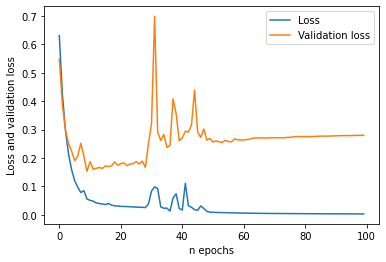

In [27]:
plt.figure()
plt.plot(historyVotes.history['loss'])
plt.plot(historyVotes.history['val_loss'])
plt.xlabel('n epochs')
plt.ylabel('Loss and validation loss')
plt.legend(['Loss','Validation loss'])
plt.show()

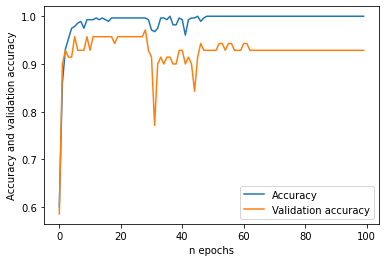

In [28]:
plt.figure()
plt.plot(historyVotes.history['accuracy'])
plt.plot(historyVotes.history['val_accuracy'])
plt.xlabel('n epochs')
plt.ylabel('Accuracy and validation accuracy')
plt.legend(['Accuracy','Validation accuracy'])
plt.show()